In [1]:
%load_ext autoreload
%autoreload 2

# Starter Notebook

Use this notebook as a starting point for using the library.

## setup access token

We're using dotenv library here, alternatively you can simply set the environment variable as:
```
import os
os.environ["CODE_GENIE_TOKEN"] = "your-access-token-here"
```

Though it is not recommended to do so as notebooks are typically shared with others and you should keep your access token private.

In [2]:
from dotenv import load_dotenv

In [3]:
load_dotenv("../../.env")  # replace with path to your env file

True

## setup cache

By default the package will cache genie invocations in a temp file. This would mean that any genies created will be lost once you restart the kernel or rerun the notebook at another time. to keep the cached genies, you can set a custom path where genies would be stored so that you will not lose them when you rerun the notebook.

You can modify the cached code if you'd like and those modifications would be loaded the next time you run the code.

In [4]:
from code_genie import set_cache_dir
set_cache_dir("./_cache_starter")

## Create data

while you should import your own dataset, we can use code-genie to generate the data for this analysis

In [5]:
from code_genie.genie import Genie, PandasGenie

In [6]:
data_gen = Genie(instructions=["generate a pandas dataframe containing 100 rows with employee information with following columns:",
                               "id: random employee id",
                               "name: employee name",
                               "salary: salary per annum in USD",
                               "department: should be either engineering or product"],
                override=False)

Loading executor from cache file generate_employee_df_41317.py, set override = True to rerun


In [7]:
df = data_gen()
df.shape

(100, 4)

In [8]:
df.head()

,id,name,salary,department
0,9853,Employee_1,43446,engineering
1,2444,Employee_2,142980,engineering
2,1450,Employee_3,93806,engineering
3,3799,Employee_4,125635,engineering
4,3559,Employee_5,105519,engineering


### add missing values

In [9]:
data_gen_add_missing = PandasGenie("make salaries for around 10% of the employees missing",
                                   columns=list(df.columns))

Executor saved to cache file make_salaries_missing_76197.py


In [10]:
df_missing = data_gen_add_missing(df)

In [12]:
df_missing["salary"].isnull().sum()

10

## Analyze data

### find number of missing values in each column

In [13]:
num_missing = PandasGenie("find number of missing values in each column")

Executor saved to cache file count_missing_35951.py


In [14]:
num_missing(df_missing)

id             0
name           0
salary        10
department     0
dtype: int64

### plot distribution of salary

In [15]:
dist_salary = PandasGenie("plot distribution of salary, create bins of 10K each", columns=df_missing.columns)

Executor saved to cache file plot_salary_distribution_54098.py


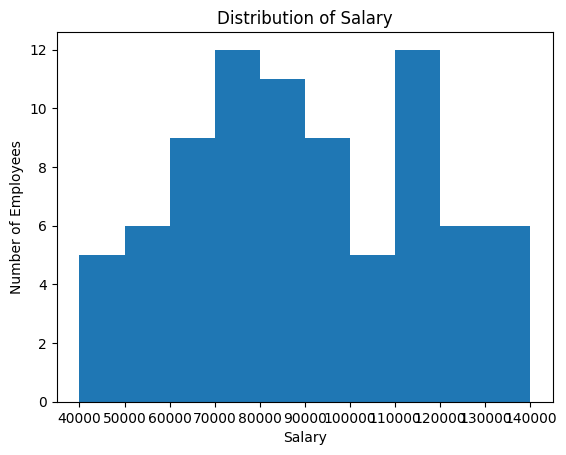

In [16]:
dist_salary(df_missing)

In [17]:
dept_salary = PandasGenie("make boxplots of salary grouped by department", columns=df_missing.columns)

Executor saved to cache file make_boxplots_25996.py


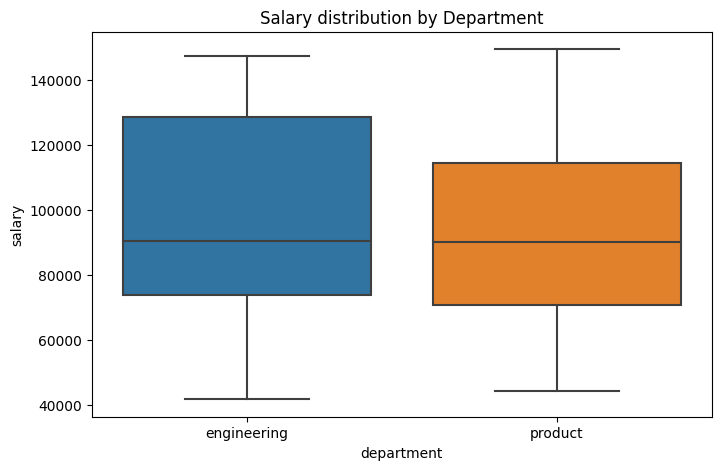

In [18]:
dept_salary(df_missing)

In [21]:
dept_100k = PandasGenie("how many people in each department make more than 100K?", columns=df_missing.columns)

Loading executor from cache file count_high_earners_86151.py, set override = True to rerun


In [22]:
dept_100k(df_missing)

department
engineering    20
product        18
Name: id, dtype: int64

# Inspecting Code

All the genies export the generated code to the cache_dir path under individual py files. The exact name of the file used can be found in the log generated on execution. These could be of 2 types:

1. `Executor saved to cache file make_boxplots_25996.py`: this will be shown the first time we run this
2. `Loading executor from cache file count_high_earners_86151.py, set override = True to rerun`: this will be shown when we run the genie after its cached without setting `override=True`

all cached py files for the starter notebook can be found [here](https://github.com/thismlguy/code-genie/tree/main/docs/notebooks/_cache_starter)

In [24]:
# the code can be inspected using `code` property:
print(data_gen.code)

import pandas as pd
import random

def generate_employee_df():
    employee_data = {"id": [random.randint(1000,9999) for i in range(100)],
                     "name": ["Employee_" + str(i) for i in range(1,101)],
                     "salary": [random.randint(40000,150000) for i in range(100)],
                     "department": ["engineering" if i<50 else "product" for i in range(100)]}
    
    employee_df = pd.DataFrame(employee_data)
    return employee_df



In [9]:
# the filename in which a genie is stored can be found using the `filename` property:
data_gen.filename

'generate_employee_df_41317.py'